In [90]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity

# Introduction and Business Understanding

Refer to:https://www.britannica.com/money/retailing
https://www.statista.com/statistics/678153/amazon-ad-cost/#:~:text=Since%202014%2C%20Amazon%27s%20annual%20advertising,dollars%20in%20the%20previous%20year.
https://www.forbes.com/advisor/business/start-a-blog/

Retailing is the selling of goods and services to consumer end users, according to ENCYCLOPAEDIA BRITANNICA. Since internet has become nearly indispensable in peoples lives, mechanisms to use it to enhance sales and increase profits has been developed and optimized. Nowadays, the aquisition of data from users permitted companies to achieve a certain level of knowledge about people navigating through internet that has made possible to them to create a customized experience to each person, turning them in potential customers. This experience comes often through advertising, customized according to each person personal data collected from diverse sources, including navigating history, previous online purchase activity, and even data collected from microphones in our mobile devices.

Companies pay for this data, and they pay sources of information that gather viewers to include advertising in their websites leading to retailers profits.  For instance, according to (Coppola, 2023), Amazon has spent over 20 billion dollars in advertising and other promotional costs. To use this data in an efficient way, making the most out of advertising, retailers use Machine Learning models to understand peoples preferences, and recommend products according to behavior and to their personal data. These Machine Learning models are called Recommendation Systems. 

The dataset that will be explored in this project can be found in the link https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions/data?select=interactions_validation.csv, and it refers to data collected from a website that provides culinary recipes to users, in a format of a blog. The dataset was chosen because it contains similar features to retailers. Although it does not aim to sell its recipes, blogs are one of the sources targeted by companies to expose advertising. According to (Mimi Polner, 2023), blogs can be used to bring in sales or an income, and bloggers bring in an average annual income of $37,073. Some of the ways explored by the article that brings income to bloggers are Advertising Networks, Digital Products, Affiliate Links or Codes and Premium Content. We can therefore, consider blogs as a direct advertising retail business, in which the blogger aim to sell space for advertising in its website, and the quality of the content and experience will bring in more viewers, potentially increasing profits.

When we first verified our dataset, we noticed it contains 231,637 recipes! That may generate confusion on users that might head towards a more classified source of information. This is when recommendation systems comer to action. It is able to analyse customers preferences and recommend them customized content, so that they can increase interaction and improve experience with the website. As we will verify below, this can be achieved based exclusively on the content previously consumed by the user, called content based recommendation system, or based in content previously consumed by other users with similar interests to the first, called collaborative recommendation system.

In [91]:
#Importing both dataset that will be used on the analysis
df_recipes = pd.read_csv('/Users/arthurassis/Documents/CCT - Data Analytics for Business/Machine Learning/Semester 2/CA02-MachineLearning:DataVisualisation-Semester 2/archive/RAW_recipes.csv')
df_users = pd.read_csv('/Users/arthurassis/Documents/CCT - Data Analytics for Business/Machine Learning/Semester 2/CA02-MachineLearning:DataVisualisation-Semester 2/archive/RAW_interactions.csv')

# Data cleaning

In [92]:
#Verifying the first 5 rows off the recipes dataset
df_recipes.head()

name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   
3                          alouette  potatoes   59389       45   
4          amish  tomato ketchup  for canning   44061      190   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   
3           68585  2003-04-14   
4           41706  2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7  
1  ['prepared pizza crust', 'sausage patty', 'egg...              6  
2  ['ground beef', 'yellow onions', 'diced tomato...             13  
3  ['spreadable cheese with garlic and herbs', 'n...             11  
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8

In [93]:
#Verifying basic informations of the recipes dataset
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


We can verify that our dataset contains 231,637 observations and 12 features. It seems that the data is nearly complete, except for 1 recipe that does not have name, and around 5,000 that does not have any description. We can drop those observations once they represent something around 2% of our dataset. 

We also verify that our dataset has a date feature, that is read as an object, and it will be converted into datetime object to help in future analysis.

In [94]:
#Dropping null observations for the columns name and description.
df_recipes.name.dropna(inplace = True)
df_recipes.description.dropna(inplace = True)

In [95]:
#Converting the column submitted into datetime object
df_recipes['submitted'] = pd.to_datetime(df_recipes['submitted'])

In [96]:
#Verifying the first 5 rows of the interactions dataset
df_users.head()

user_id  recipe_id        date  rating  \
0    38094      40893  2003-02-17       4   
1  1293707      40893  2011-12-21       5   
2     8937      44394  2002-12-01       4   
3   126440      85009  2010-02-27       5   
4    57222      85009  2011-10-01       5   

                                              review  
0  Great with a salad. Cooked on top of stove for...  
1  So simple, so delicious! Great for chilly fall...  
2  This worked very well and is EASY.  I used not...  
3  I made the Mexican topping and took it to bunk...  
4  Made the cheddar bacon topping, adding a sprin...

In [97]:
#Verifying basic informations of the interactions dataset
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


It is possible to verify that in this case we have over a million observations and 5 features. Again the data is quite clean, and only less than 200 fields on reviews are null, what represents a negligible parcell of the whole that, and there it will also be dropped. We will also convert the date column in this case to a datetime object.

In [98]:
#Dropping null observations on the column review
df_users.review.dropna(inplace = True)

In [99]:
#Converting the column date into datetime object
df_users['date'] = pd.to_datetime(df_users['date'])

Now, we will merge the dataset of our recipes, into the dataset of our reviews, so that we can have one single dataset containing recipes and reviews.

In [100]:
#Renaming the column id on the recipe dataset to match the name on the users dataset
df_recipes.rename(columns= {'id':'recipe_id'}, inplace = True)

In [101]:
df = pd.merge(df_users, df_recipes, on = 'recipe_id', how = 'left')

In [102]:
df.head()

user_id  recipe_id       date  rating  \
0    38094      40893 2003-02-17       4   
1  1293707      40893 2011-12-21       5   
2     8937      44394 2002-12-01       4   
3   126440      85009 2010-02-27       5   
4    57222      85009 2011-10-01       5   

                                              review  \
0  Great with a salad. Cooked on top of stove for...   
1  So simple, so delicious! Great for chilly fall...   
2  This worked very well and is EASY.  I used not...   
3  I made the Mexican topping and took it to bunk...   
4  Made the cheddar bacon topping, adding a sprin...   

                                   name  minutes  contributor_id  submitted  \
0  white bean   green chile pepper soup      495            1533 2002-09-21   
1  white bean   green chile pepper soup      495            1533 2002-09-21   
2      devilicious cookie cake delights       20           56824 2002-10-27   
3                 baked potato toppings       10           64342 2004-02-25   
4                 baked potato toppings       10           64342 2004-02-25   

                                                tags  \
0  ['weeknight', 'time-to-make', 'course', 'main-...   
1  ['weeknight', 'time-to-make', 'course', 'main-...   
2  ['30-minutes-or-less', 'time-to-make', 'course...   
3  ['15-minutes-or-less', 'time-to-make', 'course...   
4  ['15-minutes-or-less', 'time-to-make', 'course...   

                                           nutrition  n_steps  \
0           [204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]        4   
1           [204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]        4   
2           [132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]        5   
3  [2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]        3   
4  [2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]        3   

                                               steps  \
0  ['combine beans , onion , chilies , 1 / 2 teas...   
1  ['combine beans , onion , chilies , 1 / 2 teas...   
2  ['blend together cake mix , oil and eggs', 'ad...   
3  ['pick whichever topping you want to use and c...   
4  ['pick whichever topping you want to use and c...   

                                         description  \
0                        easy soup for the crockpot.   
1                        easy soup for the crockpot.   
2                                                NaN   
3  these toppings sure makes a nice change from p...   
4  these toppings sure makes a nice change from p...   

                                         ingredients  n_ingredients  
0  ['great northern beans', 'yellow onion', 'dice...              9  
1  ['great northern beans', 'yellow onion', 'dice...              9  
2  ["devil's food cake mix", 'vegetable oil', 'eg...              4  
3  ['mayonnaise', 'salsa', 'cheddar cheese', 'ref...             13  
4  ['mayonnaise', 'salsa', 'cheddar cheese', 'ref...             13

In [103]:
#Verifying main informations of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1132367 entries, 0 to 1132366
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   user_id         1132367 non-null  int64         
 1   recipe_id       1132367 non-null  int64         
 2   date            1132367 non-null  datetime64[ns]
 3   rating          1132367 non-null  int64         
 4   review          1132198 non-null  object        
 5   name            1132366 non-null  object        
 6   minutes         1132367 non-null  int64         
 7   contributor_id  1132367 non-null  int64         
 8   submitted       1132367 non-null  datetime64[ns]
 9   tags            1132367 non-null  object        
 10  nutrition       1132367 non-null  object        
 11  n_steps         1132367 non-null  int64         
 12  steps           1132367 non-null  object        
 13  description     1108857 non-null  object        
 14  ingredients     11

We will again drop our null observations.

In [104]:
#Dropping null values
df.dropna(inplace = True)

Let us visualise now some features of our data.

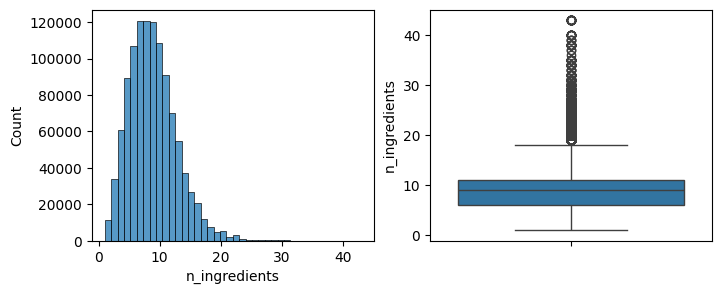

In [105]:
#Printing the distribution of n_ingredients
fig, ax = plt.subplots(ncols=2, figsize=[8, 3])
sns.histplot(df['n_ingredients'], bins = 40, ax=ax[0]);
sns.boxplot(data = df, y='n_ingredients', ax=ax[1]);

In [106]:
#Verifying the number of times each recipe was reviewed.
df['recipe_id'].value_counts()

2886      1609
27208     1601
89204     1579
39087     1448
67256     1322
          ... 
383756       1
323922       1
308247       1
266486       1
386618       1
Name: recipe_id, Length: 226650, dtype: int64

We can verify that our dataset has very few reviews for most of the recipes, whereas a small percentage of it have a high amount of reviews. We will now verify which amount of data might be considered relevant on the scope of this project.

In [107]:
#Counting the number of reviews in our users dataset
recipe_count = df_users.groupby(by = 'recipe_id').size().reset_index()

In [108]:
#Calculating the rating average per recipe in our interation dataset
recipe_rating = df_users.groupby(by = 'recipe_id')['rating'].mean()

In [109]:
#Inserting the rating average on our recipe dataset
df_recipes = pd.merge(df_recipes, recipe_rating, on='recipe_id',
                      how='left')

In [110]:
#Inserting the number of reviews in our recipes dataset
df_recipes = pd.merge(df_recipes, recipe_count, on='recipe_id',
                      how='left')

In [112]:
#Renaming the column for n_reviews
df_recipes.rename(columns = {0:'n_reviews'}, inplace=True)

In [113]:
df_recipes.head()

name  recipe_id  minutes  \
0  arriba   baked winter squash mexican style     137739       55   
1            a bit different  breakfast pizza      31490       30   
2                   all in the kitchen  chili     112140      130   
3                          alouette  potatoes      59389       45   
4          amish  tomato ketchup  for canning      44061      190   

   contributor_id  submitted  \
0           47892 2005-09-16   
1           26278 2002-06-17   
2          196586 2005-02-25   
3           68585 2003-04-14   
4           41706 2002-10-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   
3  ['60-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   
3   [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]       11   
4   [352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]        5   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   
3  ['place potatoes in a large pot of lightly sal...   
4  ['mix all ingredients& boil for 2 1 / 2 hours ...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   
3  this is a super easy, great tasting, make ahea...   
4  my dh's amish mother raised him on this recipe...   

                                         ingredients  n_ingredients  rating  \
0  ['winter squash', 'mexican seasoning', 'mixed ...              7     5.0   
1  ['prepared pizza crust', 'sausage patty', 'egg...              6     3.5   
2  ['ground beef', 'yellow onions', 'diced tomato...             13     4.0   
3  ['spreadable cheese with garlic and herbs', 'n...             11     4.5   
4  ['tomato juice', 'apple cider vinegar', 'sugar...              8     5.0   

   n_reviews  
0          3  
1          4  
2          1  
3          2  
4          1

In [114]:
df_recipes[df_recipes['n_reviews']>5].count()

name              42884
recipe_id         42884
minutes           42884
contributor_id    42884
submitted         42884
tags              42884
nutrition         42884
n_steps           42884
steps             42884
description       41963
ingredients       42884
n_ingredients     42884
rating            42884
n_reviews         42884
dtype: int64

We can verify that among our whole dataset, that contains over 200,000 recipes, only around 1/5 contain more than 5 reviews. It will be considered relevant in this dataset only the the 40,000 most reviewed recipes. The 2 reasons for this are the fact that we believe we can perform a better analysis following in this way, and the second is that while performing the methods required on the scope of the project for recommendation systems, the system could not perform the operations with more than 40,000 observations of recipes.

In [115]:
#Filtering the most relevant 40000 recipes on the dataset containing information of users and recipes
reviews_count = df['recipe_id'].value_counts()
most_reviewed = reviews_count.head(40000).index.tolist()
df_relevant = df[df['recipe_id'].isin(most_reviewed)]

In [116]:
#Filtering the most relevant 40000 reviews only on the dataset containing information of recipes
most_relevant_reviews = 40000
relevant_recipes = df_recipes.nlargest(most_relevant_reviews, 'n_reviews').reset_index()

In [117]:
relevant_recipes.head()

index                                               name  recipe_id  \
0   22168                                  best banana bread       2886   
1  213826                         to die for crock pot roast      27208   
2   66687  crock pot chicken with black beans   cream cheese      89204   
3   62431                         creamy cajun chicken pasta      39087   
4   22388   best ever banana cake with cream cheese frosting      67256   

   minutes  contributor_id  submitted  \
0       65            1762 1999-09-26   
1      545           28201 2002-05-03   
2      243          137839 2004-04-16   
3       25           30534 2002-09-02   
4       75           82367 2003-07-24   

                                                tags  \
0  ['time-to-make', 'course', 'main-ingredient', ...   
1  ['weeknight', 'time-to-make', 'course', 'main-...   
2  ['time-to-make', 'course', 'main-ingredient', ...   
3  ['30-minutes-or-less', 'time-to-make', 'course...   
4  ['weeknight', 'time-to-make', 'course', 'main-...   

                                      nutrition  n_steps  \
0    [272.8, 16.0, 97.0, 14.0, 7.0, 31.0, 14.0]       13   
1     [295.2, 14.0, 0.0, 15.0, 99.0, 19.0, 0.0]        7   
2   [679.2, 53.0, 39.0, 38.0, 91.0, 75.0, 16.0]        5   
3  [719.1, 63.0, 12.0, 34.0, 78.0, 120.0, 15.0]        4   
4  [503.5, 31.0, 222.0, 15.0, 11.0, 61.0, 25.0]       18   

                                               steps  \
0  ['remove odd pots and pans from oven', 'prehea...   
1  ['place beef roast in crock pot', 'mix the dri...   
2  ['take 4-5 frozen , yes , frozen , boneless ch...   
3  ['place chicken and cajun seasoning in a bowl ...   
4  ['preheat oven to 275f', 'grease and flour a 9...   

                                         description  \
0  you'll never need another banana bread recipe ...   
1  amazing flavor, and so simple! no salt needed ...   
2  i love this crock-pot chicken recipe for two r...   
3  n'awlin's style of chicken with an updated alf...   
4  this is one of (if not) the best banana cake i...   

                                         ingredients  n_ingredients    rating  \
0  ['butter', 'granulated sugar', 'eggs', 'banana...              8  4.185989   
1  ['beef roast', 'brown gravy mix', 'dried itali...              5  4.288570   
2  ['boneless chicken breasts', 'black beans', 'c...              5  4.220393   
3  ['boneless skinless chicken breast halves', 'l...             12  4.541436   
4  ['bananas', 'lemon juice', 'flour', 'baking so...             13  4.329047   

   n_reviews  
0       1613  
1       1601  
2       1579  
3       1448  
4       1322

We understand that the number of reviews refers to engagement in one specific page of our website. Therefore, using the information that we have on our dataset, if we are able to discover what increases the number of reviews, we can optimize our website to increase it views, and therefore sales.

This will be discussed by the end of the report, for now, we will turn back to building a recommendation system based on our relevant dataset.

# Building a content based recommendation system

A content based recommendation is a recommendation system which is based exclusively in the characteristics of the products. It bases its recommendations in the similarity that exists between two products. For instance, in our context, if a visitor on the website clicks on a recipe of banana cake, the content based recommendation system is able to provide recommendation of recipes that uses similar ingredients, or spent a similar time to get ready, such as a banana bread. Let us verify how we can build a recommendation system for out data. 

In our case, we will buid a recommendation engine based in three features of our dataset: tags, nutrition and ingredients. Tags are related to the keywords related to the recipe, nutrition is referent to the nutritional values of the recipe, and ingredients, the necessary ingredients to cook the recipe.

In [118]:
#Verifying the average of rating on our relevant dataset
rating_average = relevant_recipes['rating'].mean()
print(rating_average)

4.450785045245674


In [119]:
#Let us see the first 10 rows on 
relevant_recipes.description.head(10)

0    you'll never need another banana bread recipe ...
1    amazing flavor, and so simple! no salt needed ...
2    i love this crock-pot chicken recipe for two r...
3    n'awlin's style of chicken with an updated alf...
4    this is one of (if not) the best banana cake i...
5    absolutely delicious meatloaf and sauce! those...
6    my kids will give up a steak dinner for this s...
7    these are absolutely the chewiest, moistest, f...
8    cooking the meatballs in simmering pasta sauce...
9    we have a japanese girl, tomoko, living with u...
Name: description, dtype: object

In [120]:
#Printing the first row of the feature tag
print(relevant_recipes.tags[0])

['time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'north-american', 'breads', 'fruit', 'american', 'oven', 'dietary', 'quick-breads', 'equipment', '4-hours-or-less']


In [121]:
#Selecting the filters that we will parse.
features = ['tags','ingredients']

To read our string as a list of itens, we need to parse it. Although when we look to our tags and ingredients, they seem to be a list of values, primarily python reads them only as a sequence of strings, rather than a list of items. To fix this, we can use the function literal_eval that reads the line as though it was a code, and extracts the meaning of it.

In [122]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

for feature in features:
    relevant_recipes[feature] = relevant_recipes[feature].apply(literal_eval)

We have chosen in this case to use only the first five tags selected by the person who submitted the recipe. However, using more than 5 could enhance the recommendaton engine, however at cost of more power to process the information. 

Before we select our ingrediets and tags to make the metadata soup, we want to parse our data removing incoviente information that may lead our model to bad results. (Leitch, 2020) discussed the issue of the ingredients for a recommendation systems of recipes utilizing a different dataset. He discusses that some words on our ingredients do not contribute to our recommendations, such and some words that are very common in almost every recipe, such as oil, and weights and measures. Furtermore, he discusses that some words might appear in singular and plural, or using gerunds, suggesting lemmatization as a solution for the issue. He proposes a parser for his own project that will be applyied in our dataset. The parser was found on his Github.

In [123]:
#Parser provided by (Leitch, 2020) on his Github.
import pandas as pd
import nltk
import string
import ast
import re
import unidecode

# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter
import config

# Weigths and measures are words that will not add value to the model. I got these standard words from
# https://en.wikibooks.org/wiki/Cookbook:Units_of_measurement

# # We lemmatize the words to reduce them to their smallest form (lemmas).
# lemmatizer = WordNetLemmatizer()
# measures = [lemmatizer.lemmatize(m) for m in measures]
# words_to_remove = [lemmatizer.lemmatize(m) for m in words_to_remove]


def ingredient_parser(ingreds):
    """

    This function takes in a list (but it is a string as it comes from pandas dataframe) of
       ingredients and performs some preprocessing.
       For example:

       input = '['1 x 1.6kg whole duck', '2 heaped teaspoons Chinese five-spice powder', '1 clementine',
                 '6 fresh bay leaves', 'GRAVY', '', '1 bulb of garlic', '2 carrots', '2 red onions',
                 '3 tablespoons plain flour', '100 ml Marsala', '1 litre organic chicken stock']'

       output = ['duck', 'chinese five spice powder', 'clementine', 'fresh bay leaf', 'gravy', 'garlic',
                 'carrot', 'red onion', 'plain flour', 'marsala', 'organic chicken stock']

    """
    measures = ['teaspoon', 't', 'tsp.', 'tablespoon', 'T', 'tbl.', 'tb', 'tbsp.', 'fluid ounce', 'fl oz',
                'gill', 'cup', 'c', 'pint', 'p', 'pt', 'fl pt', 'quart', 'q', 'qt', 'fl qt', 'gallon', 
                'g', 'gal', 'ml', 'milliliter', 'millilitre', 'cc', 'mL', 'l', 'liter', 'litre', 'L', 
                'dl', 'deciliter', 'decilitre', 'dL', 'bulb', 'level', 'heaped', 'rounded', 'whole',
                'pinch', 'medium', 'slice', 'pound', 'lb', '#', 'ounce', 'oz', 'mg', 'milligram',
                'milligramme', 'g', 'gram', 'gramme', 'kg', 'kilogram', 'kilogramme', 'x', 'of', 'mm', 
                'millimetre', 'millimeter', 'cm', 'centimeter', 'centimetre', 'm', 'meter', 'metre',
                'inch', 'in', 'milli', 'centi', 'deci', 'hecto', 'kilo']
    words_to_remove = ['fresh', 'oil', 'a', 'red', 'bunch', 
                       'and', 'clove', 'or', 'leaf', 'chilli',
                       'large', 'extra', 'sprig', 'ground', 'handful', 'free', 'small', 'pepper', 'virgin', 'range', 
                       'from', 'dried', 'sustainable', 'black', 'peeled', 'higher', 
                       'welfare', 'seed', 'for', 'finely', 'freshly', 'sea', 'quality', 
                       'white', 'ripe', 'few', 'piece', 'source', 'to', 'organic', 'flat', 
                       'smoked', 'ginger', 'sliced', 'green', 'picked', 'the', 'stick', 'plain',
                       'plus', 'mixed', 'mint', 'bay', 'basil', 'your', 'cumin', 'optional', 
                       'fennel', 'serve', 'mustard', 'unsalted', 'baby', 'paprika', 'fat', 
                       'ask', 'natural', 'skin', 'roughly', 'into', 'such', 'cut', 'good', 
                       'brown', 'grated', 'trimmed', 'oregano', 'powder', 'yellow', 'dusting', 
                       'knob', 'frozen', 'on', 'deseeded', 'low', 'runny', 'balsamic', 'cooked', 
                       'streaky', 'nutmeg', 'sage', 'rasher', 'zest', 'pin', 'groundnut', 'breadcrumb',
                       'turmeric', 'halved', 'grating', 'stalk', 'light', 'tinned', 'dry', 'soft', 
                       'rocket', 'bone', 'colour', 'washed', 'skinless', 'leftover', 'splash', 
                       'removed', 'dijon', 'thick', 'big', 'hot', 'drained', 'sized', 'chestnut', 
                       'watercress', 'fishmonger', 'english', 'dill', 'caper', 'raw', 'worcestershire',
                       'flake', 'cider', 'cayenne', 'tbsp', 'leg', 'pine', 'wild', 'if', 'fine', 'herb',
                       'almond', 'shoulder', 'cube', 'dressing', 'with', 'chunk', 'spice', 'thumb', 'garam',
                       'new', 'little', 'punnet', 'peppercorn', 'shelled', 'saffron', 'other''chopped',
                       'salt', 'olive', 'taste', 'can', 'sauce', 'water', 'diced', 'package', 'italian', 
                       'shredded', 'divided', 'parsley', 'vinegar', 'all', 'purpose', 'crushed', 'juice', 
                       'more', 'coriander', 'bell', 'needed', 'thinly', 'boneless', 'half', 'thyme', 'cubed',
                       'cinnamon', 'cilantro', 'jar', 'seasoning', 'rosemary', 'extract', 'sweet', 'baking',
                       'beaten', 'heavy', 'seeded', 'tin', 'vanilla', 'uncooked', 'crumb', 'style', 'thin', 
                       'nut', 'coarsely', 'spring', 'chili', 'cornstarch', 'strip', 'cardamom', 'rinsed',
                       'honey', 'cherry', 'root', 'quartered', 'head', 'softened', 'container', 'crumbled', 
                       'frying', 'lean', 'cooking', 'roasted', 'warm', 'whipping', 'thawed', 'corn',
                       'pitted', 'sun', 'kosher', 'bite', 'toasted', 'lasagna', 'split', 'melted', 'degree',
                       'lengthwise', 'romano', 'packed', 'pod', 'anchovy', 'rom', 'prepared', 'juiced', 
                       'fluid', 'floret', 'room', 'active', 'seasoned', 'mix', 'deveined', 'lightly',
                       'anise', 'thai', 'size', 'unsweetened', 'torn', 'wedge', 'sour', 'basmati', 
                       'marinara', 'dark', 'temperature', 'garnish', 'bouillon', 'loaf', 'shell', 
                       'reggiano', 'canola', 'parmigiano', 'round', 'canned', 'ghee', 'crust', 
                       'long', 'broken', 'ketchup', 'bulk', 'cleaned', 'condensed', 'sherry', 
                       'provolone', 'cold', 'soda', 'cottage', 'spray', 'tamarind', 'pecorino', 
                       'shortening', 'part', 'bottle', 'sodium', 'cocoa', 'grain', 'french', 'roast', 
                       'stem', 'link', 'firm', 'asafoetida', 'mild', 'dash', 'boiling']
    # The ingredient list is now a string so we need to turn it back into a list. We use ast.literal_eval
    if isinstance(ingreds, list):
        ingredients = ingreds
    else:
        ingredients = ast.literal_eval(ingreds)
    # We first get rid of all the punctuation. We make use of str.maketrans. It takes three input
    # arguments 'x', 'y', 'z'. 'x' and 'y' must be equal-length strings and characters in 'x'
    # are replaced by characters in 'y'. 'z' is a string (string.punctuation here) where each character
    #  in the string is mapped to None.
    translator = str.maketrans("", "", string.punctuation)
    lemmatizer = WordNetLemmatizer()
    ingred_list = []
    for i in ingredients:
        i.translate(translator)
        # We split up with hyphens as well as spaces
        items = re.split(" |-", i)
        # Get rid of words containing non alphabet letters
        items = [word for word in items if word.isalpha()]
        # Turn everything to lowercase
        items = [word.lower() for word in items]
        # remove accents
        items = [
            unidecode.unidecode(word) for word in items
        ]  #''.join((c for c in unicodedata.normalize('NFD', items) if unicodedata.category(c) != 'Mn'))
        # Lemmatize words so we can compare words to measuring words
        items = [lemmatizer.lemmatize(word) for word in items]
        # Gets rid of measuring words/phrases, e.g. heaped teaspoon
        items = [word for word in items if word not in measures]
        # Get rid of common easy words
        items = [word for word in items if word not in words_to_remove]
        if items:
            ingred_list.append(" ".join(items))
    # ingred_list = " ".join(ingred_list)
    return ingred_list

In [124]:
#Applying the parser on our ingredients list
relevant_recipes['ingredients_parsed']  = relevant_recipes['ingredients'].apply(lambda x: ingredient_parser(x))

In [125]:
relevant_recipes['tags'][0]

['time-to-make',
 'course',
 'main-ingredient',
 'cuisine',
 'preparation',
 'north-american',
 'breads',
 'fruit',
 'american',
 'oven',
 'dietary',
 'quick-breads',
 'equipment',
 '4-hours-or-less']

In [126]:
relevant_recipes['tags'][1000]

['30-minutes-or-less',
 'time-to-make',
 'course',
 'main-ingredient',
 'cuisine',
 'preparation',
 'occasion',
 'lunch',
 'side-dishes',
 'eggs-dairy',
 'rice',
 'easy',
 'european',
 'dinner-party',
 'fall',
 'holiday-event',
 'kid-friendly',
 'winter',
 'italian',
 'cheese',
 'stove-top',
 'dietary',
 'seasonal',
 'low-calorie',
 'comfort-food',
 'low-carb',
 'inexpensive',
 'low-in-something',
 'pasta-rice-and-grains',
 'taste-mood',
 'equipment']

In [127]:
relevant_recipes['tags'][5000]

['60-minutes-or-less',
 'time-to-make',
 'course',
 'main-ingredient',
 'cuisine',
 'preparation',
 'occasion',
 'north-american',
 'low-protein',
 'healthy',
 'cobblers-and-crisps',
 'desserts',
 'fruit',
 'canadian',
 'easy',
 'beginner-cook',
 'potluck',
 'grains',
 'dietary',
 'low-sodium',
 'low-cholesterol',
 'low-saturated-fat',
 'comfort-food',
 'low-in-something',
 'apples',
 'pasta-rice-and-grains',
 'taste-mood',
 'sweet',
 'to-go']

We can also verify through the examples above, that our first are usually very similar among themselves, what means that getting the first tags it is not the best idea, therefore, we will select 5 tags after the sixth one.

In [128]:
#Defining a function that gets 5 tags for each recipe.
def get_first_five(x):
    return x[6:11]

In [129]:
#Applying the function in our dataset
relevant_recipes['tags'] = relevant_recipes['tags'].apply(get_first_five)

In [130]:
#Printing the dataset that will be used in our recommendation system
relevant_recipes[['tags', 'ingredients']].head()

tags  \
0           [breads, fruit, american, oven, dietary]   
1  [occasion, north-american, 5-ingredients-or-le...   
2  [poultry, vegetables, easy, beginner-cook, chi...   
3  [occasion, north-american, for-1-or-2, main-di...   
4  [for-large-groups, desserts, fruit, cakes, die...   

                                         ingredients  
0  [butter, granulated sugar, eggs, bananas, all-...  
1  [beef roast, brown gravy mix, dried italian sa...  
2  [boneless chicken breasts, black beans, corn, ...  
3  [boneless skinless chicken breast halves, ling...  
4  [bananas, lemon juice, flour, baking soda, sal...

We can create now the metadata soup that will be feed in our vectorizer.

In [131]:
def create_soup(x):
    return ' '.join(x['tags']) +' '+' '.join(x['ingredients'])

In [132]:
# Create a new soup feature
relevant_recipes['soup'] = relevant_recipes.apply(create_soup, axis=1)

In [133]:
relevant_recipes['soup'].head()

0    breads fruit american oven dietary butter gran...
1    occasion north-american 5-ingredients-or-less ...
2    poultry vegetables easy beginner-cook chicken ...
3    occasion north-american for-1-or-2 main-dish e...
4    for-large-groups desserts fruit cakes dietary ...
Name: soup, dtype: object

In [134]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(relevant_recipes['soup'])

In [135]:
count_matrix.shape

(40000, 2857)

Our Vectorizer has found 2857 vocabularies used on the dataset according to the features we have used.

In [136]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(count_matrix[:20000], count_matrix[:20000])

In [137]:
print(cosine_sim)

[[1.         0.04490133 0.         ... 0.49391458 0.15990054 0.11785113]
 [0.04490133 1.         0.         ... 0.03225806 0.03829198 0.04233338]
 [0.         0.         1.         ... 0.         0.05170877 0.11433239]
 ...
 [0.49391458 0.03225806 0.         ... 1.         0.03829198 0.        ]
 [0.15990054 0.03829198 0.05170877 ... 0.03829198 1.         0.05025189]
 [0.11785113 0.04233338 0.11433239 ... 0.         0.05025189 1.        ]]


Each row and column of our cosine_sim matrix is a recipe, and the intersection is the cosine similarity between the recipe on the row and in its respective column. We know the order was kept, but we do not have tha name of each recipe, therefore we need to build a reverse mapping to get the name of our recommendations.

In [138]:
# Reset index of your main DataFrame and construct reverse mapping as before
indices = pd.Series(relevant_recipes.index, index=relevant_recipes['name'])

In [139]:
#Printing the name of 25 recipes
print(indices[25:50])

name
fudge crinkles  a great 4 ingredient cake mix cookie          25
pork chops yum yum                                            26
olive garden copycat zuppa toscana                            27
kittencal s 5 minute cinnamon flop brunch cake                28
pulled pork  crock pot                                        29
reeses squares   5 ingredients   no bake  reese s             30
greek potatoes  oven roasted and delicious                    31
chicken tortilla soup ii                                      32
the best chili you will ever taste                            33
the sweetest blueberry muffins                                34
p  f  chang s mongolian beef by todd wilbur                   35
better than olive garden alfredo sauce                        36
melt in your mouth chicken breasts                            37
absolute best ever lasagna                                    38
crumb topped banana muffins                                   39
easy stove top macar

In [140]:
# Function that takes in Recipe name as input and outputs most similar recipes
def get_recommendations(name, cosine_sim=cosine_sim):
    # Get the index of the recipe that matches the title
    idx = indices[name]

    # Get the pairwise similarity scores of all recipes with that recipe
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the recipes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar recipes (0 is excluded because it would be the own recipe itself)
    sim_scores = sim_scores[1:11]

    # Get the recipes id
    recipes_id = [i[0] for i in sim_scores]

    # Return the top 10 most similar recipes
    return relevant_recipes['name'].iloc[recipes_id]

In [141]:
get_recommendations('dark chocolate cake')

16028                       ora s deep dark chocolate cake
497                 hershey s chocolate cake with frosting
15265                                 chocolate snack cake
9781                          moms chocolate zucchini cake
12018                        the best chocolate snack cake
13231                       spago s chocolate chiffon cake
2349     ultra moist starbucks chocolate cake  or cupcakes
17350               easy one bowl apple snack brownie cake
6520                      super moist chocolate spelt cake
216                               mom s chocolate cupcakes
Name: name, dtype: object

# Creating a Collaborative Filtering

Collaborative Filtering, different of content recommendation systems, do not use products data to find similary among products. Instead, it uses data from different users, and based on what users like or dislike, the recommendation is made. There are two mechanisms on Collaborative Filtering that can be used to create recommendations, the user-based and the item-based. 

It is important to understand that although item-based may sound like a recommendation based on features of the products, it is not. Both of them are based in the similarity of users previous actions, rather than the content of the product. For instance, in our business case, we may discover that users that have rated chicken based recipes, have also rated nuts based recipes. Once a new user access the system and rate by the first time a chicken recipe, our recommendation system will recommend nuts based recipe, rather for the similarity between users preferences than for the similarity between the recipes itself. 

What differs item-based and user-based collaborative filtering, is the method used to calculate the similarity between the rating. While in user-based, the filter will consider users that liked the same recipes as the criteria to recommend, in item-based, the filter will consider recipes that are likely enjoyed together by users to recommend. 

We will in this project build an user-based recommendation system.

In the first step, we want to filter back in our interactions dataset, only reviews that were written to recipes in our list of relevant recipes. To do it, we first first convert our recipe_id from our relevant recipes dataset into a list, according to suggested by (Naveen(NKK), 2023), and then we filter our interactions dataset to only recipes that are inside the list created, as suggested by (Cloud, 2023).

In [142]:
#Getting a list of values of all of our relevant recipes values
valid_recipes_id = relevant_recipes['recipe_id'].values.tolist()

In [143]:
#Printing the list just created
valid_recipes_id

[2886,
 27208,
 89204,
 39087,
 67256,
 54257,
 22782,
 32204,
 69173,
 68955,
 33919,
 82102,
 25885,
 28148,
 135350,
 26110,
 99476,
 10744,
 129926,
 33671,
 63689,
 150863,
 97496,
 107786,
 5170,
 32614,
 95222,
 38298,
 77397,
 131018,
 29679,
 87782,
 4627,
 73166,
 50719,
 66121,
 141983,
 37336,
 28768,
 43509,
 60350,
 76864,
 150384,
 2496,
 27520,
 89207,
 31750,
 9272,
 92095,
 78814,
 132263,
 76930,
 53914,
 15411,
 8701,
 73825,
 90674,
 15242,
 32844,
 80156,
 261889,
 200296,
 63828,
 31128,
 71373,
 70165,
 33921,
 15865,
 26370,
 77585,
 34382,
 9836,
 33489,
 27144,
 114392,
 27210,
 66596,
 106251,
 52035,
 43023,
 63786,
 69630,
 205890,
 103215,
 26217,
 82925,
 128956,
 46922,
 95569,
 349246,
 15072,
 47195,
 16531,
 8782,
 108364,
 3470,
 107997,
 22176,
 48760,
 46877,
 133751,
 53878,
 65340,
 145038,
 63071,
 221743,
 56103,
 1356,
 87085,
 31717,
 48635,
 8739,
 29598,
 66703,
 4957,
 52488,
 80470,
 34499,
 49387,
 54351,
 222188,
 83524,
 26257,
 20616

In [144]:
#Creating a matrix for true or false deppending on whether each recipe in df_users is in our valid recipes list
mask = df_users['recipe_id'].isin(valid_recipes_id)

In [145]:
#Filtering based on the list only users that rated valid recipes.
df_validusers = df_users[mask]

In [146]:
#Printing first rows of our dataset
df_validusers

user_id  recipe_id       date  rating  \
8             76535     134728 2005-09-02       4   
9            273745     134728 2005-12-22       5   
10           353911     134728 2006-09-26       5   
11           190375     134728 2007-03-09       5   
12           468945     134728 2008-02-20       0   
...             ...        ...        ...     ...   
1132356      199020      82303 2013-03-18       5   
1132357     1122988      82303 2014-07-08       5   
1132358  2000137415      82303 2015-04-13       1   
1132359  2001898209      82303 2018-07-05       5   
1132360  2002357020      82303 2018-12-05       5   

                                                    review  
8                                               Very good!  
9                                   Better than the real!!  
10       Absolutely AWESOME! I was speechless when I tr...  
11       These taste absolutely wonderful!!  My son-in-...  
12       Made my own buttermilk w/ vinegar and milk.  U...  
...                                                    ...  
1132356  5 stars for taste! I had a hard time getting m...  
1132357  This was amazingly delicious!  The only change...  
1132358  I&#039;ve improvised sauces that turned out be...  
1132359  This is the best and easiest hot fudge ever. I...  
1132360  Delicious quick thick chocolate sauce with ing...  

[740700 rows x 5 columns]

In [147]:
#Verifying the number of users that have reviewed
df_validusers.user_id.nunique()

176700

Verifying our new dataset, we can see it still contains over 700,000 observations and nearly 200,000 users! That happens because most of our reviews are concentrated in a small parcell of all the reviews. The method used to create used-based recommendations require creating a matrix calculating similarity between each user, what would generate 4e10 calculations. In this case, an item-based engine is more recommended. However, we will explore and user-user recommendations based on the 10,000 most commmon users of our website. 

In [148]:
#Grouping our dataset by users_id to filter only the 10,000 most common users.
users_count = df_validusers.groupby(by = 'user_id').size().reset_index()

In [149]:
#Renaming the columns count created
users_count.rename(columns = {0:'count'}, inplace = True)

In [150]:
#Defining our threshold
most_common_users = 7500

In [151]:
#Extracting the common users based on our threshold
common_users = users_count.nlargest(most_common_users, 'count').reset_index()

In [152]:
#Getting a list of the common users_id
common_users_id = common_users['user_id'].values.tolist()

In [153]:
#Filtering our valid users dataset into a sample dataset
df_sampleusers = df_validusers[df_validusers['user_id'].isin(common_users_id)]

In [154]:
#Printing our sample dataset
df_sampleusers

user_id  recipe_id       date  rating  \
8          76535     134728 2005-09-02       4   
12        468945     134728 2008-02-20       0   
13        255338     134728 2008-04-11       5   
20        202555     225241 2007-06-20       5   
21        353579     225241 2007-08-14       5   
...          ...        ...        ...     ...   
1132321   780172     290157 2009-03-15       5   
1132322   482933     290157 2009-08-16       5   
1132355   140132      82303 2010-10-01       5   
1132356   199020      82303 2013-03-18       5   
1132357  1122988      82303 2014-07-08       5   

                                                    review  
8                                               Very good!  
12       Made my own buttermilk w/ vinegar and milk.  U...  
13       First time using liquid smoke in a recipe. Mad...  
20       My husband has just found out that he had to c...  
21       Very good, made with ingredients I usually hav...  
...                                                    ...  
1132321  I very seldom buy or make spice mixes, not sur...  
1132322  Perfect combination of flavors!  I used this f...  
1132355  This is fabulous.  I made it for our dessert t...  
1132356  5 stars for taste! I had a hard time getting m...  
1132357  This was amazingly delicious!  The only change...  

[460395 rows x 5 columns]

Now that we reduced our dataset only to the top 10.000 users, we will apply the methods to seek for recommendations for a certain user, based on its similarity to other users.

In [155]:
#Finding the mean of rating of each user
Mean = df_sampleusers.groupby(by="user_id",as_index=False)['rating'].mean()

In [156]:
Mean.rename(columns = {'rating':'rating_avg'}, inplace = True)

In [157]:
#Including the average rating into our dataset.
df_sampleusers = pd.merge(df_sampleusers,Mean,on='user_id')

In [159]:
df_sampleusers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460395 entries, 0 to 460394
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     460395 non-null  int64         
 1   recipe_id   460395 non-null  int64         
 2   date        460395 non-null  datetime64[ns]
 3   rating      460395 non-null  int64         
 4   review      460394 non-null  object        
 5   rating_avg  460395 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 24.6+ MB


In [160]:
df_sampleusers.head()

user_id  recipe_id       date  rating  \
0    76535     134728 2005-09-02       4   
1    76535      79378 2006-05-29       5   
2    76535      96091 2005-05-16       2   
3    76535      36984 2006-11-27       4   
4    76535      70965 2003-10-06       3   

                                              review  rating_avg  
0                                         Very good!    4.158537  
1  Frosty and delicious! I added more sugar to mi...    4.158537  
2                               This was just so-so.    4.158537  
3                                         Very good!    4.158537  
4  These were gooey and wonderful--and a perfect ...    4.158537

In [161]:
#Calculating the adjusted rating, defined as the rating of a user to a recipe and the mean of that user
df_sampleusers['adj_rating']=df_sampleusers['rating']-df_sampleusers['rating_avg']

In [162]:
#Creating a matrix with users on rows, recipes on columns, and ratings from users to recipes on values.
#Every NaN means that that user did not review that recipe
check = pd.pivot_table(df_sampleusers,values='rating',index='user_id',columns='recipe_id')
check

recipe_id   40      49      58      62      66      91      93      112     \
user_id                                                                      
1533           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1535           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1634           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1676           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1792           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2001453193     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2001497311     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2001513060     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2001704911     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2001836906     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

recipe_id   142     143     ...  524947  524958  524960  530004  530478  \
user_id                     ...                                           
1533           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
1535           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
1634           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
1676           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
1792           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2001453193     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2001497311     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2001513060     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2001704911     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
2001836906     NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   

recipe_id   531172  532740  534900  536119  536678  
user_id                                             
1533           NaN     NaN     NaN     NaN     NaN  
1535           NaN     NaN     NaN     NaN     NaN  
1634           NaN     NaN     NaN     NaN     NaN  
1676           NaN     NaN     NaN     NaN     NaN  
1792           NaN     NaN     NaN     NaN     NaN  
...            ...     ...     ...     ...     ...  
2001453193     NaN     NaN     NaN     NaN     NaN  
2001497311     NaN     NaN     NaN     NaN     NaN  
2001513060     NaN     NaN     NaN     NaN     NaN  
2001704911     NaN     NaN     NaN     NaN     NaN  
2001836906     NaN     NaN     NaN     NaN     NaN  

[7500 rows x 39586 columns]

In [163]:
#Now we will create a matrix with the difference of an users review to a recipe, and this user's mean to
#every recipe he had reviewd.
#Creating a matrix  with the same caracteristics as before but with adjusted rating on the values
final = pd.pivot_table(df_sampleusers,values='adj_rating',index='user_id',columns='recipe_id')
final.head()

recipe_id  40      49      58      62      66      91      93      112     \
user_id                                                                     
1533          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1535          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1634          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1676          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1792          NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

recipe_id  142     143     ...  524947  524958  524960  530004  530478  \
user_id                    ...                                           
1533          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
1535          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
1634          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
1676          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
1792          NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   

recipe_id  531172  532740  534900  536119  536678  
user_id                                            
1533          NaN     NaN     NaN     NaN     NaN  
1535          NaN     NaN     NaN     NaN     NaN  
1634          NaN     NaN     NaN     NaN     NaN  
1676          NaN     NaN     NaN     NaN     NaN  
1792          NaN     NaN     NaN     NaN     NaN  

[5 rows x 39586 columns]

Now we are gonna generate two matrix's, the first wil be the previous matrix, filling all the NaN values of each feature with the mean of that feature, and the second will be the previous matrix with each row filled with the mean of the row.

In [187]:
# Replacing NaN by user Average
final_user = final.apply(lambda row: row.fillna(row.mean()), axis=1)

In this matrix, each column is the average score of a recipe, considering all reviews it has received. Therefore, similar reviews mean that these recipes are similar. 

In [165]:
#Printing the matrix final user created
final_user.head()

recipe_id        40            49            58            62      \
user_id                                                             
1533       2.478637e-16  2.478637e-16  2.478637e-16  2.478637e-16   
1535      -2.173745e-16 -2.173745e-16 -2.173745e-16 -2.173745e-16   
1634      -1.837611e-16 -1.837611e-16 -1.837611e-16 -1.837611e-16   
1676       4.099285e-16  4.099285e-16  4.099285e-16  4.099285e-16   
1792      -2.049643e-16 -2.049643e-16 -2.049643e-16 -2.049643e-16   

recipe_id        66            91            93            112     \
user_id                                                             
1533       2.478637e-16  2.478637e-16  2.478637e-16  2.478637e-16   
1535      -2.173745e-16 -2.173745e-16 -2.173745e-16 -2.173745e-16   
1634      -1.837611e-16 -1.837611e-16 -1.837611e-16 -1.837611e-16   
1676       4.099285e-16  4.099285e-16  4.099285e-16  4.099285e-16   
1792      -2.049643e-16 -2.049643e-16 -2.049643e-16 -2.049643e-16   

recipe_id        142           143     ...        524947        524958  \
user_id                                ...                               
1533       2.478637e-16  2.478637e-16  ...  2.478637e-16  2.478637e-16   
1535      -2.173745e-16 -2.173745e-16  ... -2.173745e-16 -2.173745e-16   
1634      -1.837611e-16 -1.837611e-16  ... -1.837611e-16 -1.837611e-16   
1676       4.099285e-16  4.099285e-16  ...  4.099285e-16  4.099285e-16   
1792      -2.049643e-16 -2.049643e-16  ... -2.049643e-16 -2.049643e-16   

recipe_id        524960        530004        530478        531172  \
user_id                                                             
1533       2.478637e-16  2.478637e-16  2.478637e-16  2.478637e-16   
1535      -2.173745e-16 -2.173745e-16 -2.173745e-16 -2.173745e-16   
1634      -1.837611e-16 -1.837611e-16 -1.837611e-16 -1.837611e-16   
1676       4.099285e-16  4.099285e-16  4.099285e-16  4.099285e-16   
1792      -2.049643e-16 -2.049643e-16 -2.049643e-16 -2.049643e-16   

recipe_id        532740        534900        536119        536678  
user_id                                                            
1533       2.478637e-16  2.478637e-16  2.478637e-16  2.478637e-16  
1535      -2.173745e-16 -2.173745e-16 -2.173745e-16 -2.173745e-16  
1634      -1.837611e-16 -1.837611e-16 -1.837611e-16 -1.837611e-16  
1676       4.099285e-16  4.099285e-16  4.099285e-16  4.099285e-16  
1792      -2.049643e-16 -2.049643e-16 -2.049643e-16 -2.049643e-16  

[5 rows x 39586 columns]

In this matrix, every recipe that was reviewed by a user will be compared with the mean of this user. Therefore, users that has similar averages, are considered similar among themselves. Afterwards, this similarity will be calculated to users using the consine_similarity function.

In [166]:
# user similarity on replacing NAN by user avg
b = cosine_similarity(final_user)
np.fill_diagonal(b, 0 )
similarity_with_user = pd.DataFrame(b,index=final_user.index)
similarity_with_user.columns=final_user.index
similarity_with_user.head()

user_id    1533          1535          1634          1676          1792        \
user_id                                                                         
1533     0.000000e+00  1.108474e-03  5.896334e-03  3.115529e-28 -2.326204e-28   
1535     1.108474e-03  0.000000e+00  1.024527e-29 -5.301604e-29  4.186211e-29   
1634     5.896334e-03  1.024527e-29  0.000000e+00 -8.699537e-29  6.481114e-29   
1676     3.115529e-28 -5.301604e-29 -8.699537e-29  0.000000e+00 -3.309089e-28   
1792    -2.326204e-28  4.186211e-29  6.481114e-29 -3.309089e-28  0.000000e+00   

user_id    1891          2178          2310          2312          2586        \
user_id                                                                         
1533     3.682537e-28 -3.081488e-33  9.670064e-29  6.803132e-29 -1.929376e-28   
1535     2.338683e-03  3.047755e-03  1.573654e-03  2.058606e-03  2.327661e-03   
1634    -1.031358e-28  3.152333e-03 -1.290495e-02 -1.929332e-29  5.356210e-29   
1676     5.274522e-28 -9.244464e-33  1.341072e-28  9.760947e-29 -2.824430e-28   
1792    -3.919151e-28 -3.081488e-33 -1.044528e-28 -7.128427e-29  3.457134e-03   

user_id  ...    2001356926  2001359614    2001362355    2001410644  \
user_id  ...                                                         
1533     ...  2.475513e-29         0.0 -9.934101e-29  9.244656e-28   
1535     ...  2.490325e-03         0.0  8.614560e-04 -1.672531e-28   
1634     ... -8.376255e-30         0.0  2.773955e-29 -2.568414e-28   
1676     ...  4.235813e-29         0.0 -1.405097e-28  1.316721e-27   
1792     ... -3.247118e-29         0.0  1.036304e-28 -9.807215e-28   

user_id    2001436530    2001453193  2001497311    2001513060    2001704911  \
user_id                                                                       
1533     4.001263e-28  1.988988e-29         0.0 -6.179115e-29  8.483350e-28   
1535    -7.340663e-29 -2.895106e-30         0.0  1.036408e-29 -1.447970e-02   
1634    -1.108522e-28 -5.441594e-30         0.0  1.721644e-29 -2.345670e-28   
1676     5.734669e-28  2.201522e-29         0.0  1.290744e-02  1.219463e-27   
1792    -4.250578e-28 -2.121745e-29         0.0  6.514199e-29 -9.124484e-28   

user_id    2001836906  
user_id                
1533    -1.404511e-28  
1535     2.895940e-03  
1634     3.904939e-29  
1676    -2.012242e-28  
1792     1.483182e-28  

[5 rows x 7500 columns]

In [168]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [169]:
# Getting the 30 more similar users to each user by their average
sim_user_30_u = find_n_neighbours(similarity_with_user,30)
sim_user_30_u.head()

top1    top2    top3    top4    top5    top6    top7    top8  \
user_id                                                                    
1533       75805   41799  183872  114317  231507   68727  403729  104600   
1535     1328641  390553  177019  408707   55225  564378  322326  241504   
1634      167527  258739   66899  978876  394077   69260  180406  599284   
1676      433588  135542  467341  304596   57491  173880   88826  382007   
1792      105125  798181  289117   58469  160947   35106  212497  464189   

            top9       top10  ...    top21    top22    top23   top24    top25  \
user_id                       ...                                               
1533      294000      138861  ...    25983   217121  1266251  441165   514193   
1535      181319  2000758272  ...   416537   189500   860538  225896   574083   
1634      100185      516537  ...  1361337  1588002  1139501   29794    78884   
1676      302618      453440  ...   130219   106867   369956   57324  1145840   
1792     1126368       12129  ...   237533    27142    55224   81511   198874   

           top26   top27   top28    top29    top30  
user_id                                             
1533     1244849   63048   64342    47421    58439  
1535       61525  881750  130531  1008996   159070  
1634      310156  288704  209447   180440  1168372  
1676      337399   80219  520644   240668   169850  
1792      396955   87160   55818   730273   133407  

[5 rows x 30 columns]

Now we will verify which are the recipes that were reviewed by both users.

In [171]:
def get_user_similar_recipes( user1, user2 ):
    common_recipes = df_sampleusers[df_sampleusers.user_id == user1].merge(
    df_sampleusers[df_sampleusers.user_id == user2],
    on = "recipe_id",
    how = "inner" )
    return common_recipes.merge(df_recipes, on = 'recipe_id' )

In [172]:
a = get_user_similar_recipes(353579,255338)
a = a.loc[ : , ['rating_x_x','rating_x_y','name']]
a.head()

KeyError: "['rating_x_x', 'rating_x_y'] not in index"

In [173]:
a.head()

user_id_x  recipe_id     date_x  rating_x  \
0     353579      95863 2007-12-26         4   
1     353579     107072 2006-11-18         4   
2     353579      31804 2008-04-11         5   
3     353579     120479 2008-10-11         5   
4     353579     276472 2008-07-08         5   

                                            review_x  rating_avg_x  \
0  These are very nice.  They would be great eith...      4.776173   
1  I really enjoyed this.  The flavors all blende...      4.776173   
2  This is an amazingly moist and flavorful choco...      4.776173   
3  These received thumbs up all around.  They are...      4.776173   
4  This is a nice marinade - I was only able to m...      4.776173   

   adj_rating_x  user_id_y     date_y  rating_y  ...  submitted  \
0     -0.776173     255338 2010-03-30         5  ... 2004-07-19   
1     -0.776173     255338 2007-04-25         5  ... 2004-12-28   
2      0.223827     255338 2006-08-24         5  ... 2002-06-20   
3      0.223827     255338 2007-02-25         5  ... 2005-05-04   
4      0.223827     255338 2008-01-16         5  ... 2008-01-04   

                                                tags  \
0  ['30-minutes-or-less', 'time-to-make', 'course...   
1  ['lactose', '30-minutes-or-less', 'time-to-mak...   
2  ['60-minutes-or-less', 'time-to-make', 'course...   
3  ['time-to-make', 'course', 'cuisine', 'prepara...   
4  ['30-minutes-or-less', 'time-to-make', 'course...   

                                       nutrition n_steps  \
0          [76.5, 3.0, 24.0, 2.0, 2.0, 7.0, 4.0]       9   
1  [944.9, 47.0, 214.0, 72.0, 117.0, 52.0, 35.0]      13   
2   [547.6, 42.0, 184.0, 19.0, 15.0, 16.0, 23.0]       7   
3     [432.3, 34.0, 82.0, 5.0, 15.0, 50.0, 17.0]      23   
4      [242.3, 12.0, 31.0, 43.0, 57.0, 9.0, 3.0]      10   

                                               steps  \
0  ['preheat oven to 350f do not do this until af...   
1  ['place cornstarch in a large bowl', 'add wate...   
2  ['mix cocoa and boiling water', 'mix buttermil...   
3  ['butter a 12-cup muffin pan', 'line a roastin...   
4  ['place chicken in gallon sized zip-lock bag a...   

                                         description  \
0  i found this recipe on the back of andes crème...   
1  if you like sweet, spicy, crispy chinese food-...   
2  i adopted this recipe.  i had prepared it for ...   
3  schnecken means “snails,” which is what these ...   
4  this is an easy and delicious main dish. if yo...   

                                         ingredients n_ingredients    rating  \
0  ['butter', 'brown sugar', 'granulated sugar', ...             9  4.380952   
1  ['flank steaks', 'cornstarch', 'water', 'eggs'...            14  4.588889   
2  ['cocoa powder', 'boiling water', 'buttermilk'...            10  4.622222   
3  ['bread flour', 'sugar', 'salt', 'fast rise ye...            14  4.482759   
4  ['ketchup', 'hoisin sauce', 'soy sauce', 'rice...            11  5.000000   

   n_reviews  
0         63  
1        180  
2        135  
3         29  
4         16  

[5 rows x 26 columns]

In [176]:
df_sampleusers = df_sampleusers.astype({"recipe_id": str})

In [177]:
recipe_user = df_sampleusers.groupby(by = 'user_id')['recipe_id'].apply(lambda x:','.join(x))

In [185]:
def User_item_score(user):
    recipes_made_by_user = check.columns[check[check.index==user].notna().any()].tolist()
    a = sim_user_30_u[sim_user_30_u.index==user].values
    b = a.squeeze().tolist()
    d = recipe_user[recipe_user.index.isin(b)]
    l = ','.join(d.values)
    recipes_made_by_similar_users = l.split(',')
    recipes_under_consideration = list(set(recipes_made_by_similar_users)-set(list(map(str, recipes_made_by_user))))
    recipes_under_consideration = list(map(int, recipes_under_consideration))
    score = []
    for item in recipes_under_consideration:
        c = final_user.loc[:,item]
        d = c[c.index.isin(b)]
        f = d[d.notnull()]
        avg_user = Mean.loc[Mean['user_id'] == user,'rating_avg'].values[0]
        index = f.index.values.squeeze().tolist()
        corr = similarity_with_user.loc[user,index]
        fin = pd.concat([f, corr], axis=1)
        fin.columns = ['adg_score','correlation']
        fin['score']=fin.apply(lambda x:x['adg_score'] * x['correlation'],axis=1)
        nume = fin['score'].sum()
        deno = fin['correlation'].sum()
        final_score = avg_user + (nume/deno)
        score.append(final_score)
    data = pd.DataFrame({'recipe_id':recipes_under_consideration,'score':score})
    top_5_recommendation = data.sort_values(by='score',ascending=False).head(5)
    Recipe_Name = top_5_recommendation.merge(df_recipes, how='inner', on='recipe_id')
    Recipe_Names = Recipe_Name.name.values.tolist()
    return Recipe_Names

In [186]:
user = int(input("Enter the user id to whom you want to recommend : "))
predicted_recipes = User_item_score(user)
print(" ")
print("The Recommendations for User Id : {}".format(user))
print("   ")
for i in predicted_recipes:
    print(i)

Enter the user id to whom you want to recommend : 353579
 
The Recommendations for User Id : 353579
   
potato kielbasa skillet
magic soup
healthier cheesy cornbread casserole
shepherd s pie oamc
real southern cornbread


In [188]:
#Getting a recommendation based on content for one of this recipes
get_recommendations('potato kielbasa skillet')

8415                        pizza meatloaf
2721     new potatoes  green beans and ham
5368     fried potatoes and smoked sausage
8792                                creole
10193    breaded southern fried pork chops
11601                 kielbasa and cabbage
541                 herbed pork tenderloin
7163                easy cheesy pork chops
8796                crock pot amish dinner
9170                      saucy cube steak
Name: name, dtype: object

In [190]:
df_recipes[df_recipes['name'] == 'potato kielbasa skillet']

name  recipe_id  minutes  contributor_id  \
164824  potato kielbasa skillet      34688       28           27643   

        submitted                                               tags  \
164824 2002-07-23  ['30-minutes-or-less', 'time-to-make', 'course...   

                                          nutrition  n_steps  \
164824  [789.3, 58.0, 32.0, 56.0, 47.0, 57.0, 29.0]        6   

                                                    steps  \
164824  ['in dutch oven , brown potatoes , kielbasa , ...   

                                              description  \
164824  a very hearty, tasty supper. this is very easy...   

                                              ingredients  n_ingredients  \
164824  ['potatoes', 'kielbasa', 'onion', 'green peppe...             11   

          rating  n_reviews  
164824  4.309524        210

In [197]:
print(df_recipes.iloc[164824,5])

['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'main-dish', 'eggs-dairy', 'pork', 'potatoes', 'vegetables', 'american', 'southern-united-states', 'easy', 'european', 'kid-friendly', 'polish', 'cheese', 'stove-top', 'dietary', 'comfort-food', 'inexpensive', 'meat', 'pork-sausage', 'taste-mood', 'equipment']


In [191]:
df_recipes[df_recipes['name'] == 'fried potatoes and smoked sausage']

name  recipe_id  minutes  contributor_id  \
87830  fried potatoes and smoked sausage     374959       35          574635   

       submitted                                               tags  \
87830 2009-05-29  ['60-minutes-or-less', 'time-to-make', 'course...   

                                         nutrition  n_steps  \
87830  [631.5, 50.0, 18.0, 32.0, 37.0, 46.0, 22.0]       10   

                                                   steps  \
87830  ['put a large skillet on the stove on med high...   

                                             description  \
87830  yummy comfort food, that the whole family will...   

                                             ingredients  n_ingredients  \
87830  ['potatoes', 'smoked sausage', 'onion', 'garli...              6   

         rating  n_reviews  
87830  4.115385         26

In [198]:
print(df_recipes.iloc[87830,5])

['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'main-dish', 'pork', 'potatoes', 'vegetables', 'easy', 'beginner-cook', 'kid-friendly', 'dietary', 'one-dish-meal', 'low-cholesterol', 'comfort-food', 'inexpensive', 'healthy-2', 'toddler-friendly', 'low-in-something', 'meat', 'pork-sausage', 'taste-mood', 'savory', '3-steps-or-less']


In [192]:
df_recipes[df_recipes['name'] == 'magic soup']

name  recipe_id  minutes  contributor_id  submitted  \
128464  magic soup      95104      210           98016 2004-07-05   

                                                     tags  \
128464  ['time-to-make', 'course', 'main-ingredient', ...   

                                        nutrition  n_steps  \
128464  [260.4, 14.0, 15.0, 4.0, 40.0, 12.0, 7.0]       17   

                                                    steps  \
128464  ['place chicken in pot , cover with cold , goo...   

                                              description  \
128464  i don't know what it is...this soup cures what...   

                                              ingredients  n_ingredients  \
128464  ['fryer chicken', 'water', 'parsnips', 'onions...             13   

          rating  n_reviews  
128464  4.384615         26

In [199]:
print(df_recipes.iloc[128464,5])

['time-to-make', 'course', 'main-ingredient', 'preparation', 'occasion', 'clear-soups', 'soups-stews', 'pasta', 'poultry', 'fall', 'kid-friendly', 'winter', 'stocks', 'chicken', 'crock-pot-slow-cooker', 'freezer', 'dietary', 'infant-baby-friendly', 'seasonal', 'comfort-food', 'oamc-freezer-make-ahead', 'inexpensive', 'toddler-friendly', 'meat', 'whole-chicken', 'pasta-rice-and-grains', 'taste-mood', 'equipment', 'number-of-servings', '4-hours-or-less']


As it is possible to verify, we are able to create a recommendation system in which no information in regards to the products were used. This system can be combined with a content based recommender to produce a model that can get more possibilities and stronger recommendation. It is interesting to observe that the the algorithm considers the fact that if a user have given a high rate to a recipe, as well as another user, it is likely that the second user will like the second recipe, because it exists a similarity between both users.

It is possible to verify in our example, that when we get recommendations based on content for potato kielbasa skillet, we get recipes that are similar to the first, taking the example of fried potatos and smoked sausages, we can see that they take similar time to get read, they apparently have similar ingredients, they are tagged with similar tags. On the other hand, we do not find anything similar between the two first dishes recommended for the user 353579. That happens because the algorithm takes into consideration the reviews among this user and other, being able to recommend based in similarity between users rather than between the recipes.

# Market Basket Analysis

It will be used in our case, the list of ingredients for recipes as our basket. It is interesting to analyse this scenario because companies that sell professional products for chefs or restaurants may benefit from the analysis verifying which kind of products are necessary together in order to produce certain food.

In [156]:
relevant_recipes['ingredients']

0        [butter, granulated sugar, eggs, bananas, all-...
1        [beef roast, brown gravy mix, dried italian sa...
2        [boneless chicken breasts, black beans, corn, ...
3        [boneless skinless chicken breast halves, ling...
4        [bananas, lemon juice, flour, baking soda, sal...
                               ...                        
39995    [eggs, potatoes, onion, white pepper, butter, ...
39996    [hard-boiled eggs, smoked salmon, butter, sour...
39997    [hellmanns mayonnaise, water, tomato paste, bu...
39998    [spiral shaped pasta, roma tomatoes, red onion...
39999    [ground beef, bacon, onion, ketchup, salt, bro...
Name: ingredients, Length: 40000, dtype: object

In [157]:
relevant_recipes['ingredients_parsed'].head()

0       [butter, granulated sugar, egg, banana, flour]
1                          [beef, gravy, salad, ranch]
2          [chicken breast, bean, salsa, cream cheese]
3    [chicken breast, linguine, cajun, butter, onio...
4    [banana, lemon, flour, butter, sugar, egg, but...
Name: ingredients_parsed, dtype: object

In [158]:
ingredients = relevant_recipes['ingredients_parsed'].values.tolist()

In [159]:
ingredients

[['butter', 'granulated sugar', 'egg', 'banana', 'flour'],
 ['beef', 'gravy', 'salad', 'ranch'],
 ['chicken breast', 'bean', 'salsa', 'cream cheese'],
 ['chicken breast',
  'linguine',
  'cajun',
  'butter',
  'onion',
  'cream',
  'tomato',
  'garlic',
  'parmesan cheese'],
 ['banana',
  'lemon',
  'flour',
  'butter',
  'sugar',
  'egg',
  'buttermilk',
  'cream cheese',
  'icing sugar',
  'walnut'],
 ['beef', 'bread', 'egg', 'vidalia onion', 'table', 'milk', 'apple', 'sugar'],
 ['sausage',
  'onion',
  'garlic',
  'tomato',
  'tomato paste',
  'tomato',
  'sugar',
  'coarse',
  'wine',
  'spaghetti',
  'parmesan cheese'],
 ['butter',
  'sugar',
  'egg',
  'flour',
  'chocolate chip',
  'raisin',
  'maraschino',
  'miniature marshmallow'],
 ['beef', 'egg', 'parmesan cheese', 'garlic', 'milk'],
 ['chicken drumstick', 'soy', 'sugar', 'garlic'],
 ['beef',
  'onion',
  'taco',
  'flour tortilla',
  'refried bean',
  'taco cheese',
  'cream mushroom soup',
  'cream'],
 ['butter',
  'garli

In [160]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Create an object te by calling a method TransactionEncoder()
te = TransactionEncoder()

# Call fit() method to train the model
te_array = te.fit(ingredients).transform(ingredients)

# Transform te_array into dataframe
EncodedIngredients = pd.DataFrame(te_array, columns = te.columns_)

In [161]:
EncodedIngredients

absolut citron vodka  absolut mandarin vodka  absolut vodka  aburage  \
0                     False                   False          False    False   
1                     False                   False          False    False   
2                     False                   False          False    False   
3                     False                   False          False    False   
4                     False                   False          False    False   
...                     ...                     ...            ...      ...   
39995                 False                   False          False    False   
39996                 False                   False          False    False   
39997                 False                   False          False    False   
39998                 False                   False          False    False   
39999                 False                   False          False    False   

       accent  aceto balsamico  achiote  achiote paste  acinus di pepe pasta  \
0       False            False    False          False                 False   
1       False            False    False          False                 False   
2       False            False    False          False                 False   
3       False            False    False          False                 False   
4       False            False    False          False                 False   
...       ...              ...      ...            ...                   ...   
39995   False            False    False          False                 False   
39996   False            False    False          False                 False   
39997   False            False    False          False                 False   
39998   False            False    False          False                 False   
39999   False            False    False          False                 False   

       acorn squash  ...  york steak  young roasting chicken  yucca  \
0             False  ...       False                   False  False   
1             False  ...       False                   False  False   
2             False  ...       False                   False  False   
3             False  ...       False                   False  False   
4             False  ...       False                   False  False   
...             ...  ...         ...                     ...    ...   
39995         False  ...       False                   False  False   
39996         False  ...       False                   False  False   
39997         False  ...       False                   False  False   
39998         False  ...       False                   False  False   
39999         False  ...       False                   False  False   

       yukon gold potato  zinfandel  zinfandel wine  ziploc bag  ziti pasta  \
0                  False      False           False       False       False   
1                  False      False           False       False       False   
2                  False      False           False       False       False   
3                  False      False           False       False       False   
4                  False      False           False       False       False   
...                  ...        ...             ...         ...         ...   
39995              False      False           False       False       False   
39996              False      False           False       False       False   
39997              False      False           False       False       False   
39998              False      False           False       False       False   
39999              False      False           False       False       False   

       zucchini  zucchini tomato  
0         False            False  
1         False            False  
2         False            False  
3         False            False  
4         False            False  
...         ...              ...  
39995     False            False  
39996     False

In [171]:
Ingredients_count = EncodedIngredients.melt()

In [177]:
Ingredients_count = Ingredients_count.groupby('variable')['value'].sum().reset_index()

In [178]:
Ingredients_count.head()

variable  value
0    absolut citron vodka      1
1  absolut mandarin vodka      1
2           absolut vodka      3
3                 aburage      1
4                  accent     38

In [184]:
Ingredients_count.rename(columns = {'variable':'Ingredients', 'value':'count'}, inplace = True)

In [187]:
Ingredients_count = Ingredients_count.sort_values(by = 'count', ascending = False)

In [188]:
Ingredients_count.head(20)

Ingredients  count
2489            onion  13328
3623            sugar  12574
1441           garlic  12405
463            butter  11806
1216              egg   9730
1344            flour   8654
2257             milk   5540
3808           tomato   4394
1006            cream   4378
1985            lemon   4227
3964        vegetable   3066
2598  parmesan cheese   2908
686    chicken breast   2655
2888           potato   2493
595            carrot   2379
4101             wine   2176
648    cheddar cheese   2108
3464              soy   2086
213              beef   2052
615            celery   1930

In [162]:
from mlxtend.frequent_patterns import apriori

# Calculate the sfrequenct itemsets by calling a method apriori
frequent_itemsets_ap = apriori(EncodedIngredients, min_support = 0.005, use_colnames = True)

In [163]:
frequent_itemsets_ap.sort_values(by = 'support', ascending = False)

support                                   itemsets
84   0.333200                                    (onion)
124  0.314350                                    (sugar)
58   0.310125                                   (garlic)
16   0.295150                                   (butter)
49   0.243250                                      (egg)
..        ...                                        ...
842  0.005000                 (garlic, egg, beef, onion)
912  0.005000  (cream cheese, egg, butter, sugar, flour)
545  0.005000                        (flour, egg, apple)
792  0.005000        (garlic, mushroom, parmesan cheese)
253  0.005000                              (carrot, pea)

[918 rows x 2 columns]

In [166]:
from mlxtend.frequent_patterns import association_rules

# Display the reles due to apriori algorithm
rules_ap = association_rules(frequent_itemsets_ap, metric = "confidence", min_threshold = 0.4)

print(rules_ap[120:150])

                antecedents        consequents  antecedent support  \
120                  (rice)           (garlic)            0.041600   
121               (sausage)           (garlic)            0.011700   
122              (scallion)           (garlic)            0.015125   
123                (sesame)           (garlic)            0.024150   
124               (shallot)           (garlic)            0.013050   
125                (shrimp)           (garlic)            0.016550   
126                   (soy)           (garlic)            0.052150   
127             (spaghetti)           (garlic)            0.010625   
128               (spinach)           (garlic)            0.018375   
129               (tabasco)           (garlic)            0.009175   
130                (tomato)           (garlic)            0.109850   
131          (tomato paste)           (garlic)            0.017800   
132                  (wine)           (garlic)            0.054400   
133              (zu

In [167]:
from mlxtend.frequent_patterns import fpgrowth

In [168]:
# Evaluate the frequent item rules for fpgrowth function
frequent_itemsets_fp1 = fpgrowth(EncodedIngredients, min_support = 0.005, use_colnames = True)

print(frequent_itemsets_fp1)

      support                itemsets
0    0.295150                (butter)
1    0.243250                   (egg)
2    0.216350                 (flour)
3    0.027775      (granulated sugar)
4    0.023025                (banana)
..        ...                     ...
913  0.009575          (curry, onion)
914  0.007450         (garlic, curry)
915  0.005650  (garlic, curry, onion)
916  0.005050     (sugar, applesauce)
917  0.005450        (sugar, coconut)

[918 rows x 2 columns]


In [169]:
# Display the reles due to fp-growth algorithm
rules_fp1 = association_rules(frequent_itemsets_fp1, metric = "confidence", min_threshold = 0.5)

print(rules_fp1)

          antecedents consequents  antecedent support  consequent support  \
0    (garlic, butter)     (onion)            0.063850            0.333200   
1               (egg)     (sugar)            0.243250            0.314350   
2     (butter, sugar)       (egg)            0.125325            0.243250   
3       (butter, egg)     (sugar)            0.113800            0.314350   
4        (sugar, egg)    (butter)            0.132525            0.295150   
..                ...         ...                 ...                 ...   
797           (curry)    (garlic)            0.013950            0.310125   
798   (garlic, curry)     (onion)            0.007450            0.333200   
799    (curry, onion)    (garlic)            0.009575            0.310125   
800      (applesauce)     (sugar)            0.006925            0.314350   
801         (coconut)     (sugar)            0.009775            0.314350   

      support  confidence      lift  leverage  conviction  zhangs_metric  


# Building a Dashboard to visualise the data

In [158]:
from jupyter_dash import JupyterDash
import dash
from dash import dcc
from dash import html
import pandas as pd

When it comes to the business we are exploring on our data, this is, using spaces in a culinary page to generate sales, and therefore income, some metrics are important to consider, the number of views on a certain page, the time that a user spent in that page, the engagement of a user on the page, and its seniment using this page. For instance, a recipes blog could sell space for advertising to grocery stores, that could explore this space to offer products related to the recipe that is being seen by the user. In this example, all the 4 factors listed above would increase the value generated for the grocery store when using the space.

In the case of our dataset, what we have in regards to these factors are n_reviews, rating and the reviews itself, that could be parsed to deliver a more accurate sentiment analysis than just rating. Watching this factors, we can analyse how some variables influence on the, such as minutes, n_steps and n_ingredients. 

We will build a dashboard that deals with this variables, and that can deliver the information of how to generate value to the blog through recommendation systems explored before.

In [372]:
#Grouping the dataset 
n_reviewsxminute = df_recipes.groupby('minutes')['n_reviews'].sum().sort_values(ascending = False).reset_index()

In [468]:
#Printing the grouped dataset
n_reviewsxminute

minutes  n_reviews  n_recipes  proportion_reviews  avg_rating  \
0         30      84800      18391            4.610951    4.357215   
1         25      67977      13204            5.148213    4.372724   
2         20      67356      14822            4.544326    4.407134   
3         40      66199      13772            4.806782    4.335133   
4         35      63295      12385            5.110618    4.331566   
..       ...        ...        ...                 ...         ...   
883    14445          1          1            1.000000    5.000000   
884      547          1          1            1.000000    0.000000   
885     3070          1          1            1.000000    5.000000   
886      317          1          1            1.000000    5.000000   
887     5800          1          1            1.000000    5.000000   

     bayes_avg_rating  
0            4.362305  
1            4.366030  
2            4.377155  
3            4.355488  
4            4.356431  
..                ...  
883          4.457267  
884          3.608161  
885          4.457267  
886          4.457267  
887          4.457267  

[888 rows x 6 columns]

In [374]:
#Merging minutes onto the dataset we have to get the information number of reviews per minutes on recipes.
n_reviewsxminute = pd.merge(n_reviewsxminute, 
                            df_recipes.groupby('minutes').size().reset_index().rename(columns = {0:'n_recipes'}), 
                            on = 'minutes')

In [376]:
#Creating a new column that calculates reviews by recipe.
n_reviewsxminute['proportion_reviews'] = n_reviewsxminute['n_reviews']/n_reviewsxminute['n_recipes']

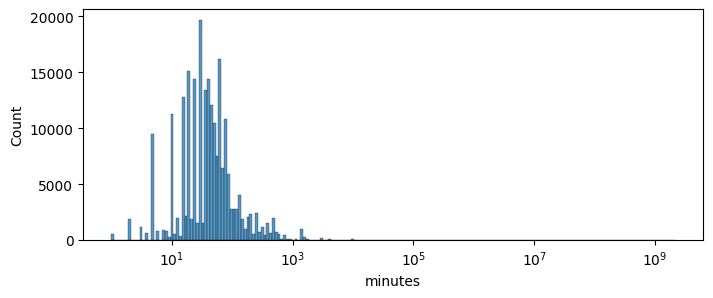

In [71]:
#This graph tells me that most of the recipes concentrate between 10 and something around 100 minutes
fig, ax = plt.subplots(figsize=[8, 3])
sns.histplot(df_recipes['minutes'], bins=200, log_scale=True);

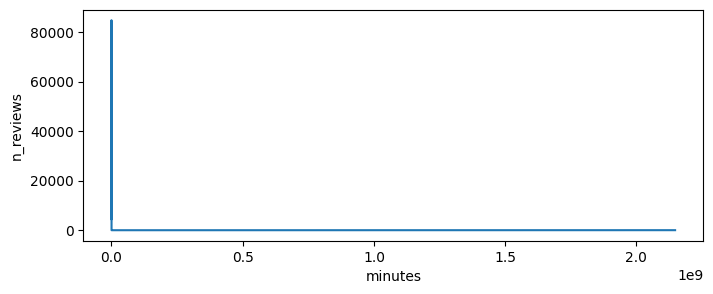

In [489]:
#Printing a lineplot to verify correlation between minutes and n_reviews
fig, ax = plt.subplots(figsize=[8, 3])
sns.lineplot(n_reviewsxminute, x='minutes', y='n_reviews');

(0.0, 200.0)

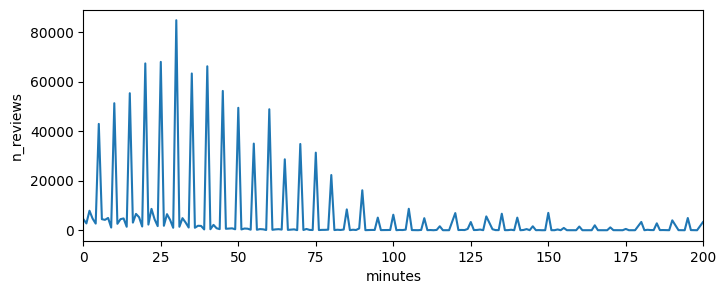

In [472]:
#Printing the same graph as before, however with the x-axis limited in 200.
fig, ax = plt.subplots(figsize=[8, 3])
sns.lineplot(n_reviewsxminute, x='minutes', y='n_reviews')
ax.set_xlim(0, 200)

(0.0, 200.0)

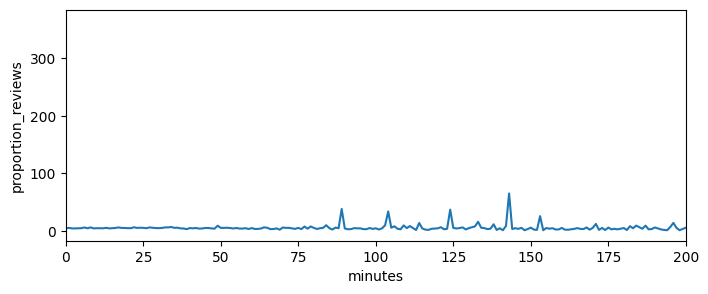

In [380]:
#Printing the reviews/recipes agains minutes
fig, ax = plt.subplots(figsize=[8, 3])
sns.lineplot(n_reviewsxminute, x='minutes', y='proportion_reviews', estimator = 'mean')
ax.set_xlim(0, 200)

In [381]:
#Filtering the most relevant 1000 reviews only on the dataset containing information of recipes
top_1000_reviews = 1000
top_1000_recipes = df_recipes.nlargest(top_1000_reviews, 'n_reviews').reset_index()

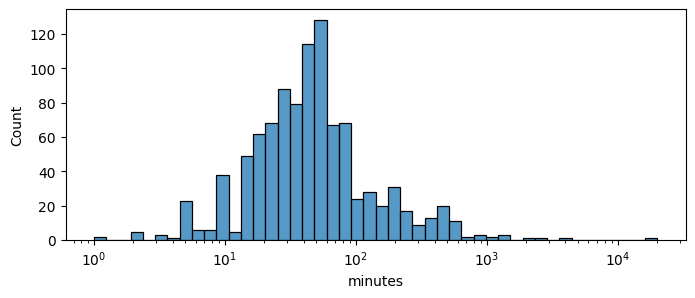

In [382]:
#This graph tells me that most of the recipes concentrate between 10 and something around 100 minutes
fig, ax = plt.subplots(figsize=[8, 3])
sns.histplot(top_1000_recipes['minutes'], log_scale=True);

In [383]:
#Getting the same information got before to the sample dataset
top_1000_n_reviewsxminute = df_recipes.groupby('minutes')['n_reviews'].sum().sort_values(ascending = False).reset_index()
top_1000_n_reviewsxminute = pd.merge(top_1000_n_reviewsxminute, 
                            top_1000_recipes.groupby('minutes').size().reset_index().rename(columns = {0:'n_recipes'}), 
                            on = 'minutes')
top_1000_n_reviewsxminute['proportion_reviews'] = top_1000_n_reviewsxminute['n_reviews']/top_1000_n_reviewsxminute['n_recipes']

In [384]:
#Printing the sample dataset
top_1000_n_reviewsxminute

minutes  n_reviews  n_recipes  proportion_reviews
0         30      84800         72         1177.777778
1         25      67977         52         1307.250000
2         20      67356         49         1374.612245
3         40      66199         59         1122.016949
4         35      63295         64          988.984375
..       ...        ...        ...                 ...
140      218        123          1          123.000000
141      114        122          1          122.000000
142     1090        120          1          120.000000
143    20190        114          1          114.000000
144      109        112          1          112.000000

[145 rows x 4 columns]

(0.0, 200.0)

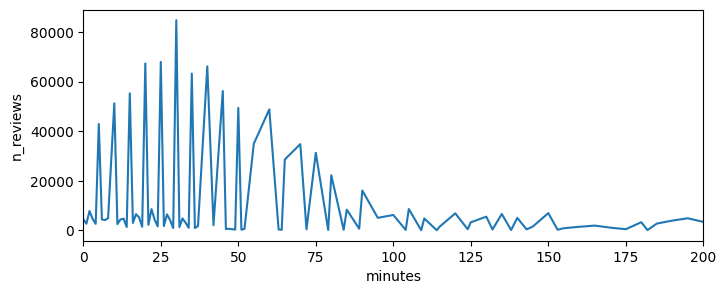

In [385]:
#Printing the minutes x n_reviews from the sample dataset
fig, ax = plt.subplots(figsize=[8, 3])
sns.lineplot(top_1000_n_reviewsxminute, x='minutes', y='n_reviews', estimator = 'mean')
ax.set_xlim(0,200)

(0.0, 200.0)

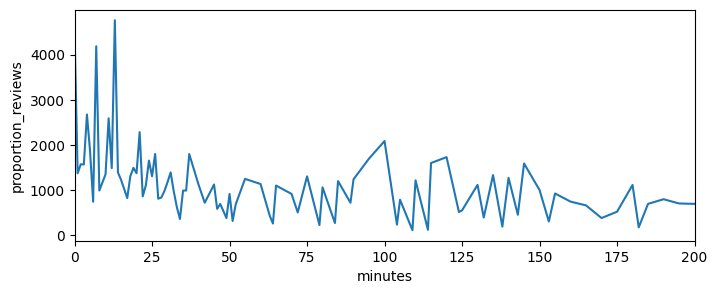

In [386]:
#Printing the proportion of reviews vs minutes for the sample dataset
fig, ax = plt.subplots(figsize=[8, 3])
sns.lineplot(top_1000_n_reviewsxminute, x='minutes', y='proportion_reviews', estimator = 'mean')
ax.set_xlim(0,200)

In [387]:
#Grouping the dataset swaping minutes by n_steps.
n_reviewsxn_steps = df_recipes.groupby('n_steps')['n_reviews'].sum().sort_values(ascending = False).reset_index()

In [388]:
#Performing the same opperationg performed before using the new variable
n_reviewsxn_steps = pd.merge(n_reviewsxn_steps, 
                            df_recipes.groupby('n_steps').size().reset_index().rename(columns = {0:'n_recipes'}), 
                            on = 'n_steps')

In [389]:
#Performing the same opperationg performed before using the new variable
n_reviewsxn_steps['proportion_reviews'] = n_reviewsxn_steps['n_reviews']/n_reviewsxn_steps['n_recipes']

In [390]:
#Performing the same opperationg performed before using the new variable
top_1000_n_reviewsxn_steps = df_recipes.groupby('n_steps')['n_reviews'].sum().sort_values(ascending = False).reset_index()
top_1000_n_reviewsxn_steps = pd.merge(top_1000_n_reviewsxn_steps, 
                            top_1000_recipes.groupby('n_steps').size().reset_index().rename(columns = {0:'n_recipes'}), 
                            on = 'n_steps')
top_1000_n_reviewsxn_steps['proportion_reviews'] = top_1000_n_reviewsxn_steps['n_reviews']/top_1000_n_reviewsxn_steps['n_recipes']

One of the common discussions when analysing products is the relationship between number of reviews and the rating. The problem arises because when calculating simple average, products the have been reviewed only 1 with a 5 star, would overweight products that have been reviews 80 times and have in average 4.8 stars, for example. When purchasing items, one commonly makes its own assumption on whats is more important. (Bengfort, 2017) discusses the subject, and proposes using a kind of weighted average called Bayesian Average to solve the issue. (Odabaşı, 2019) shows a practicle example of calculating the Bayesian Average using R, that will be used in this project.

The Bayesian average is calculated through the formula below, in which m is used for the pior value of average ratings and C is used for confidence in the prior values. Following the suggestion of  (Odabaşı, 2019), I will use average of rating by recipe for m, and average number of reviews by recipe for C.

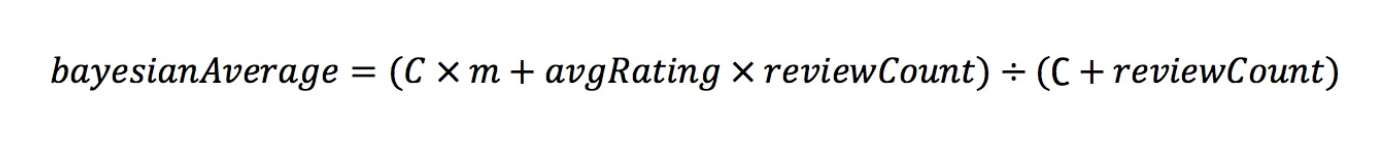

In [72]:
from IPython.display import Image
Image(filename =r'/Users/arthurassis/Documents/CCT - Data Analytics for Business/Machine Learning/Semester 2/CA02-MachineLearning:DataVisualisation-Semester 2/CA02-Integrated-ML-and-Data-Vis/Figures/Bayesian Formula.png')

In [49]:
#Calculating m and C
m = df_recipes['rating'].mean()
C = df_recipes['n_reviews'].mean()

In [50]:
#Calculating the Bayesian Average
df_recipes['bayes_avg_rating'] = (C*m + df_recipes['rating']*df_recipes['n_reviews'])/(C+df_recipes['n_reviews'])

In [393]:
## Bayesian average

n_reviewsxminute = pd.merge(n_reviewsxminute, 
                            df_recipes.groupby('minutes')['rating'].mean().reset_index().rename(columns = {'rating':'avg_rating'}), 
                            on = 'minutes')
n_reviewsxminute = pd.merge(n_reviewsxminute, 
                            df_recipes.groupby('minutes')['bayes_avg_rating'].mean().reset_index(), 
                            on = 'minutes')
n_reviewsxminute

minutes  n_reviews  n_recipes  proportion_reviews  avg_rating  \
0         30      84800      18391            4.610951    4.357215   
1         25      67977      13204            5.148213    4.372724   
2         20      67356      14822            4.544326    4.407134   
3         40      66199      13772            4.806782    4.335133   
4         35      63295      12385            5.110618    4.331566   
..       ...        ...        ...                 ...         ...   
883    14445          1          1            1.000000    5.000000   
884      547          1          1            1.000000    0.000000   
885     3070          1          1            1.000000    5.000000   
886      317          1          1            1.000000    5.000000   
887     5800          1          1            1.000000    5.000000   

     bayes_avg_rating  
0            4.362305  
1            4.366030  
2            4.377155  
3            4.355488  
4            4.356431  
..                ...  
883          4.457267  
884          3.608161  
885          4.457267  
886          4.457267  
887          4.457267  

[888 rows x 6 columns]

(0.0, 200.0)

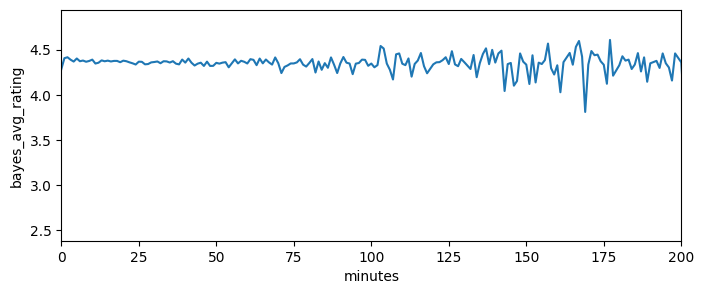

In [407]:
#Printing the bayesian average rating against minutes.
fig, ax = plt.subplots(figsize=[8, 3])
sns.lineplot(n_reviewsxminute, x='minutes', y='bayes_avg_rating', estimator = 'mean')
ax.set_xlim(0, 200)

In [83]:
px.histogram(df_recipes, x='minutes', nbins=20, color_discrete_sequence=['darkblue'], log_x=True)

I have gonne through all of these graphs to structure an idea about what would be important to observe in a businness such as the one we are exploring. Given the initia ideas, I decided to create a interactive graph in which I can select among the variables stated, and visualize the distribution of the data, number of reviews vs variables, and bayesian average, averaged by the variable vs the variable. As we could see in some graphs above, some features contain data spreaded far away, so it was decided to add the possibility to change between Linear Scale or Logarithmic Scale on the graph, making possible to observe better a wide range of values. It was also included on the graph the possibility of adjusting the length of the x-axis, so that it is possible to select parts of the graph that might be triggering in an analysis, and visualize it closer.

In regards to the target for the graph being people over 65, font sizes were increased, specialy on titles, the design was decided to be kept simple, white backgroung and dark blue colors, presenting high contrast, and not too much information on the graphs, just what is essential, in such a way that information is not overwhelming.

In [88]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Function to create the dataset grouped used to generate the graphs
def create_grouped_df_recipes(variable, data):
    # Group data by the selected variable and count the number of reviews
    grouped_df_recipes = data.groupby(variable).agg({'n_reviews': ['count', 'sum'], 'rating':'mean', 'bayes_avg_rating': 'mean'}).reset_index()
    grouped_df_recipes.columns = [variable, 'n_recipes', 'n_reviews', 'rating', 'bayes_average_rating']

    return grouped_df_recipes

# Function to get the top N most reviewed recipes
def get_top_n_recipes(data, n):
    return data.nlargest(n, 'n_reviews')

# Creating Dash app
app = dash.Dash(__name__)


# Defining the layout of the app
app.layout = html.Div([
    html.H4('Interactive Dashboard for Analysing Dataset'),
    html.Div([
        dcc.Dropdown(
        id='variable-dropdown',
        options=[
            {'label': 'Minutes', 'value': 'minutes'},
            {'label': 'Number of Steps', 'value': 'n_steps'},
            {'label': 'Number of Ingredients', 'value': 'n_ingredients'}
        ],
        value='minutes',
        style={'width': '100%', 'font-size': '18px', 'float': 'left'} 
    ),
        dcc.Dropdown(
        id='n-sample-dropdown',
        options=[
            {'label': 'Top 100 Recipes', 'value': 100},
            {'label': 'Top 1000 Recipes', 'value': 1000},
            {'label': 'Top 10000 Recipes', 'value': 10000}
        ],
        value=1000,
        style={'width': '100%', 'font-size': '18px', 'float': 'right'}  # Increase font size
    )
    ], style={'display': 'flex', 'justify-content': 'space-between',
              'borderBottom': 'thin lightgrey solid',
              'backgroundColor': 'rgb(250, 250, 250)',
              'padding': '10px 5px'}),
    html.Div([
        html.Div([
            dcc.RadioItems(
                id='log-original-dataset',
                options=[{'label': 'Linear', 'value': False},
                         {'label': 'Log Scale', 'value': True},
                ],
                value=False,
                labelStyle={'font-size': '14px','display': 'inline-block'} 
            ),
            dcc.RadioItems(
                id='log-top-N-dataset',
                options=[
                    {'label': 'Linear', 'value': False},
                    {'label': 'Log Scale', 'value': True},
                ],
                value=False,
                labelStyle={'font-size': '14px', 'display': 'inline-block'},
                style={'margin-left':'200px'}
            )
        ], style={'display': 'flex',
              'borderBottom': 'thin lightgrey solid',
              'backgroundColor': 'rgb(250, 250, 250)',
              'padding': '10px 5px'})  
    ]),
    html.Div([
        dcc.Graph(id='histogram', style={'height': '300px'}),
        dcc.Slider(
            id='x-axis-slider-histogram',
            updatemode='mouseup',
            marks={i: str(i) for i in range(0, 200, 20)},
            min=1,
            max=200,
            step=1,
            value=200
        ),
        dcc.Graph(id='lineplot', style={'height': '300px'}),
        dcc.Slider(
            id='x-axis-slider-lineplot',
            updatemode='mouseup',
            marks={i: str(i) for i in range(0, 200, 20)},
            min=0.1,
            max=200,
            step=1,
            value=200
        )
    ], style={'float': 'left', 'width': '33.33%'}),
    html.Div([
        html.Div([
        dcc.Graph(id='histogram-top-N', style={'height': '300px'}),
        dcc.Slider(
            id='x-axis-slider-histogram-top-N',
            updatemode='mouseup',
            marks={i: str(i) for i in range(0, 200, 20)},
            min=0.1,
            max=200,
            step=1,
            value=200
        ),
        dcc.Graph(id='lineplot-top-N', style={'height': '300px'}),
        dcc.Slider(
            id='x-axis-slider-lineplot-top-N',
            updatemode='mouseup',
            marks={i: str(i) for i in range(0, 200, 20)},
            min=0.1,
            max=200,
            step=1,
            value=200
        )
    ], style={'float': 'left', 'width': '33.33%'})
    ]),
    html.Div([
        dcc.Graph(id='rating-distribution', style={'height': '300px'}),
        dcc.Graph(id='bayes-average-rating-lineplot', style={'height': '300px', 'margin-top':'40px'}),
        dcc.Slider(
            id='x-axis-slider-bayes-average-rating',
            updatemode='mouseup',
            marks={i: str(i) for i in range(0, 1000, 100)},
            min=0.1,
            max=1000,
            step=1,
            value=200
        )
    ], style={'float': 'right', 'width': '33.33%'})
])

# Define callback to update the histoplot and lineplot based on the selected variable, scale, and x-axis slider
@app.callback(
    [Output('histogram', 'figure'),
     Output('lineplot', 'figure'),
     Output('histogram-top-N', 'figure'),
     Output('lineplot-top-N', 'figure'),
     Output('rating-distribution', 'figure'),
     Output('bayes-average-rating-lineplot', 'figure')],
    [Input('variable-dropdown', 'value'),
     Input('n-sample-dropdown', 'value'),
     Input('log-original-dataset', 'value'),
     Input('log-top-N-dataset', 'value'),
     Input('x-axis-slider-histogram', 'value'),
     Input('x-axis-slider-lineplot', 'value'),
     Input('x-axis-slider-histogram-top-N', 'value'),
     Input('x-axis-slider-lineplot-top-N', 'value'),
     Input('x-axis-slider-bayes-average-rating', 'value')]
)
def update_plots(selected_variable, N, log_original_dataset, log_top_N_dataset,
                 x_axis_slider_histogram, x_axis_slider_lineplot,
                 x_axis_slider_histogram_top_N, x_axis_slider_lineplot_top_N,
                 x_axis_slider_bayes_average_rating):
    
    # Get the top N most reviewed recipes
    top_N_recipes = get_top_n_recipes(df_recipes, n=N)
    
    # Plot histoplot and lineplot for the full dataset
    grouped_and_merged_data = create_grouped_df_recipes(selected_variable, df_recipes)
    dataset_histplot = px.histogram(df_recipes, x=selected_variable, title=f'Distribution of {selected_variable} <br> Whole Dataset',
                                              labels={selected_variable: f'{selected_variable}'}, template='plotly_white',
                                                log_x=log_original_dataset, nbins=200,
                                               color_discrete_sequence=['darkblue'])
    dataset_lineplot = px.line(grouped_and_merged_data, x=selected_variable, y='n_reviews',
                                        labels={'n_reviews': 'Number of Reviews'},
                                        title=f'Number of Reviews vs {selected_variable} <br> Whole Dataset',
                                        template='plotly_white', log_x=log_original_dataset,
                                          color_discrete_sequence=['darkblue'])
    dataset_histplot.update_xaxes(range=[0, x_axis_slider_histogram])
    dataset_lineplot.update_xaxes(range=[0, x_axis_slider_lineplot])

    # Plot histoplot and lineplot for the top N recipes
    grouped_and_merged_data_top_N = create_grouped_df_recipes(selected_variable, top_N_recipes)
    top_N_histplot = px.histogram(top_N_recipes, 
                                        x=selected_variable,
                                        title=f'Distribution of {selected_variable}: <br> Top {N} Recipes',
                                        labels={selected_variable: f'{selected_variable}'}, template='plotly_white',
                                        log_x=log_top_N_dataset, nbins=200, color_discrete_sequence=['darkblue'])
    
    top_N_lineplot = px.line(grouped_and_merged_data_top_N, 
                                   x=selected_variable, 
                                   y='n_reviews',
                                   labels={'n_reviews': 'Number of Reviews'},
                                   title=f'Number of Reviews vs {selected_variable}: <br> Top {N} Recipes',
                                   template='plotly_white', 
                                   log_x=log_top_N_dataset, color_discrete_sequence=['darkblue'])
    top_N_histplot.update_xaxes(range=[0, x_axis_slider_histogram_top_N])
    top_N_lineplot.update_xaxes(range=[0, x_axis_slider_lineplot_top_N])

    # Plot rating distribution and average rating lineplot
    rating_distribution = px.histogram(grouped_and_merged_data_top_N, x='rating', title='Distribution of Rating',
                                           labels={'rating': 'Rating'}, template='plotly_white', color_discrete_sequence=['darkblue'])
    bayes_average_rating_lineplot = px.line(grouped_and_merged_data_top_N, 
                                            x=selected_variable, 
                                            y='bayes_average_rating',
                                          labels={'bayes_average_rating': 'Bayesian Average Rating'},
                                          title=f'Bayesian Average Rating x {selected_variable}',
                                          template='plotly_white', color_discrete_sequence=['darkblue'])
    bayes_average_rating_lineplot.update_xaxes(range=[0, x_axis_slider_bayes_average_rating])

    return (dataset_histplot, dataset_lineplot,
            top_N_histplot, top_N_lineplot,
            rating_distribution, bayes_average_rating_lineplot)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

Visualising our dataset can help us to understand or dataset. It is possible to verify for example that the majority of our reviews are given in recipes that take under 60 minutes to finish, aproximately 8 steps, and no much more than 10 ingredients to get ready, therefore, spaces for advertising in recipes with these features are more likely to engage customers.

An observation in regards to the algorithm of the dashboards itself is that the library used to produce the graphs has an issue in regards to logarithm scales on histogram, and therefore, when changing to logarithm scale, no error will arise, however no graph will appear. This issue is being discussed in these links https://github.com/plotly/plotly.py/issues/2899, https://github.com/plotly/plotly.js/issues/6200.